In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

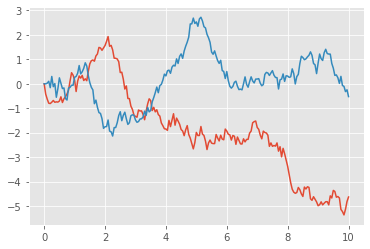

In [47]:
delta = 0.05; iters = 200; 

states1 = [0]; states2 = [0]; times = [0]
for it in range(iters):
    states1.append(states1[-1] + stat.norm(0, m.sqrt(delta)).rvs(size = 1)[0])
    states2.append(states2[-1] + stat.norm(0, m.sqrt(delta)).rvs(size = 1)[0])

plt.plot(np.arange(0, iters+1) * delta, states1)
plt.plot(np.arange(0, iters+1) * delta, states2)
plt.show()

In [48]:
def my_round(t):
    return int(round(t))

In [49]:
def new_brown(t):
    if t < 1:
        return states1[int(round(t / delta))];
    else:
        return states1[my_round(t / delta)] + t * states2[my_round(1/t / delta)] - states2[my_round(t / delta)]

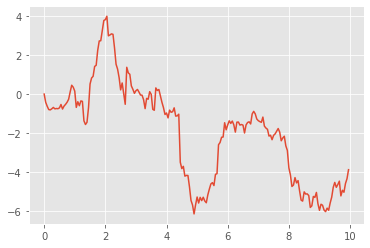

In [50]:
delta = 0.05; iters = 200; 

#states1 = [0]; states2 = [0]; times = [0]
#for it in range(iters):
#    states1.append(states1[-1] + stat.norm(0, m.sqrt(delta)).rvs(size = 1)[0])
#    states2.append(states2[-1] + stat.norm(0, m.sqrt(delta)).rvs(size = 1)[0])
    
plt.plot(np.arange(200) * delta, [new_brown(t) for t in np.linspace(0, 10, endpoint=True, num = 200)])

plt.show()